In [121]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
# reading csv files
df =  pd.read_csv('adult.data', sep=",", header=None, skipinitialspace=True)
print(df)

       0                 1       2           3   4                   5   \
0      39         State-gov   77516   Bachelors  13       Never-married   
1      50  Self-emp-not-inc   83311   Bachelors  13  Married-civ-spouse   
2      38           Private  215646     HS-grad   9            Divorced   
3      53           Private  234721        11th   7  Married-civ-spouse   
4      28           Private  338409   Bachelors  13  Married-civ-spouse   
...    ..               ...     ...         ...  ..                 ...   
32556  27           Private  257302  Assoc-acdm  12  Married-civ-spouse   
32557  40           Private  154374     HS-grad   9  Married-civ-spouse   
32558  58           Private  151910     HS-grad   9             Widowed   
32559  22           Private  201490     HS-grad   9       Never-married   
32560  52      Self-emp-inc  287927     HS-grad   9  Married-civ-spouse   

                      6              7      8       9      10  11  12  \
0           Adm-clerical  

In [181]:
# Find X and y values - selecting only important features for X
X = df.iloc[:, [0, 4, 6, 8, 9, 12, 13]]
y = df.iloc[:, [14]]
X.columns = ['Age', 'Education', 'Occupation', 'Race', 'Sex', 'Hours-per-week', 'Native-country']
print(X)



       Age  Education         Occupation   Race     Sex  Hours-per-week  \
0       39         13       Adm-clerical  White    Male              40   
1       50         13    Exec-managerial  White    Male              13   
2       38          9  Handlers-cleaners  White    Male              40   
3       53          7  Handlers-cleaners  Black    Male              40   
4       28         13     Prof-specialty  Black  Female              40   
...    ...        ...                ...    ...     ...             ...   
32556   27         12       Tech-support  White  Female              38   
32557   40          9  Machine-op-inspct  White    Male              40   
32558   58          9       Adm-clerical  White  Female              40   
32559   22          9       Adm-clerical  White    Male              20   
32560   52          9    Exec-managerial  White  Female              40   

      Native-country  
0      United-States  
1      United-States  
2      United-States  
3      

In [170]:
# Convert categorical data to numerical
mapping_dict = {'Male' : '0','Female' : '1'}
X['Sex'] = (X['Sex'].map(mapping_dict))
mapping_dict = {'White' : '0','Asian-Pac-Islander' : '1', 'Amer-Indian-Eskimo' : '2', 'Other' : '3', 'Black' : '4'}
X['Race'] = (X['Race'].map(mapping_dict))
# Set countries to numerical value, grouped countries into continents.
# North America = 0, South America = 1, Asia = 2, Europe = 3, 
mapping_dict = {'United-States' : '0', 'Cambodia' : '2', 'England' : '3', 'Puerto-Rico' : '0', 'Canada' : '0', 'Germany' : '3', 'Outlying-US(Guam-USVI-etc)' : '0', 'India' : '2', 'Japan' : '2', 'Greece' : '3', 'South' : '??????????', 'China' : '2', 'Cuba' : '0', 'Iran' : '2', 'Honduras' : '0', 'Philippines' : '2', 'Italy' : '3', 'Poland' : '3', 'Jamaica' : '0', 'Vietnam' : '2', 'Mexico' : '0', 'Portugal' : '3', 'Ireland' : '3', 'France' : '3', 'Dominican-Republic' : '0', 'Laos' : '2', 'Ecuador' : '1', 'Taiwan' : '2', 'Haiti' : '0', 'Columbia' : '1', 'Hungary' : '3', 'Guatemala' : '0', 'Nicaragua' : '0', 'Scotland' : '3', 'Thailand' : '2', 'Yugoslavia' : '3', 'El-Salvador' : '0', 'Trinadad&Tobago' : '1', 'Peru' : '1', 'Hong' : '????????', 'Holand-Netherlands' : '3', '?' : '?'}
X['Native-country'] = (X['Native-country'].map(mapping_dict)) 

# United-States, Cambodia, England, Puerto-Rico, Canada, Germany, 
# Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba,
# Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
# Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary,
# Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador,
# Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


<ipython-input-170-227b2641399a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = (X['Sex'].map(mapping_dict))
<ipython-input-170-227b2641399a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Race'] = (X['Race'].map(mapping_dict))
<ipython-input-170-227b2641399a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [171]:
# Replace all of ? with None
X = X.replace(['?'], [None])
# Drop all rows with None in them
X = X.dropna(axis=0)

# Check no None values remain
X.isnull().sum()

Age               0
Education         0
Occupation        0
Race              0
Sex               0
Hours-per-week    0
Native-country    0
dtype: int64

In [172]:
# print(X.head(50))
y.values

array([['<=50K'],
       ['<=50K'],
       ['<=50K'],
       ...,
       ['<=50K'],
       ['<=50K'],
       ['>50K']], dtype=object)

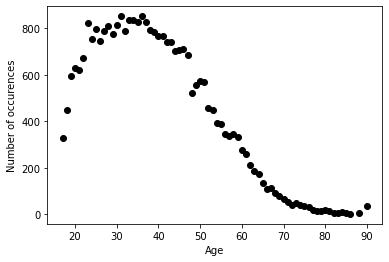

In [173]:
X['Age'].value_counts().values
X['Age'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.scatter(X['Age'].value_counts().index.tolist(), X['Age'].value_counts().values, color='black')
plt.xlabel("Age")
plt.ylabel("Number of occurences")
plt.show()

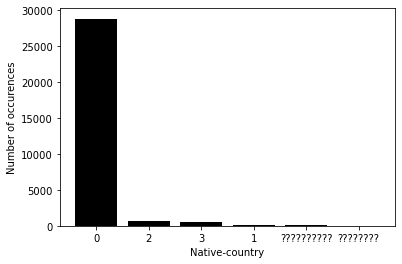

In [174]:
X['Native-country'].value_counts().values
X['Native-country'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.bar(X['Native-country'].value_counts().index.tolist(), X['Native-country'].value_counts().values, color='black')
plt.xlabel("Native-country")
plt.ylabel("Number of occurences")
plt.show()

# Compare to graph of before you formed the continent categories.

# Shows that feature scaling is required?

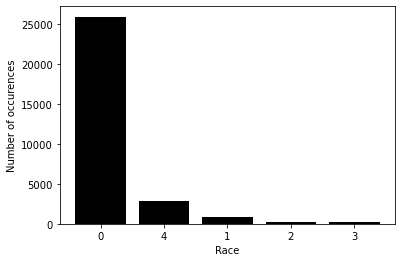

In [175]:
X['Race'].value_counts().values
X['Race'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.bar(X['Race'].value_counts().index.tolist(), X['Race'].value_counts().values, color='black')
plt.xlabel("Race")
plt.ylabel("Number of occurences")
plt.show()

# Shows that feature scaling is required?

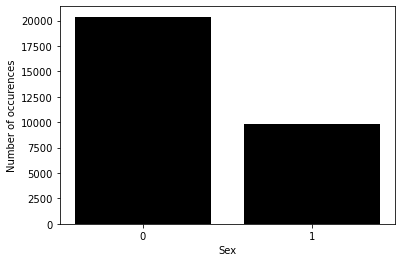

In [176]:
X['Sex'].value_counts().values
X['Sex'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.bar(X['Sex'].value_counts().index.tolist(), X['Sex'].value_counts().values, color='black')
plt.xlabel("Sex")
plt.ylabel("Number of occurences")
plt.show()

# Shows that feature scaling is required?

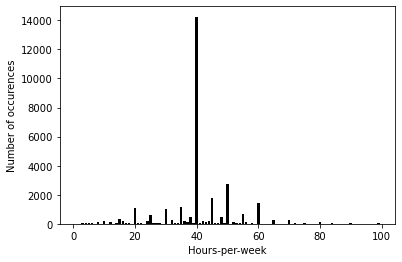

In [177]:
X['Hours-per-week'].value_counts().values
X['Hours-per-week'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.bar(X['Hours-per-week'].value_counts().index.tolist(), X['Hours-per-week'].value_counts().values, color='black')
plt.xlabel("Hours-per-week")
plt.ylabel("Number of occurences")
plt.show()

# Shows that feature scaling is required??????

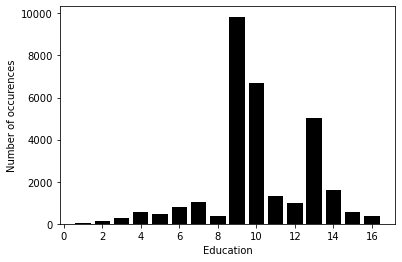

In [179]:
X['Education'].value_counts().values
X['Education'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.bar(X['Education'].value_counts().index.tolist(), X['Education'].value_counts().values, color='black')
plt.xlabel("Education")
plt.ylabel("Number of occurences")
plt.show()

# Shows that feature scaling is required?